Here we do bla bla

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
with open(r"./data/spotify_songs.csv", 'r', encoding="utf8") as f:
    df = pd.read_csv(f)

Attribute 1 primarily represented by PC1: loudness
Attribute 1 primarily represented by PC2: valence
Attribute 2 primarily represented by PC1: energy
Attribute 2 primarily represented by PC2: instrumentalness
Attribute 3 primarily represented by PC1: acousticness
Attribute 3 primarily represented by PC2: danceability


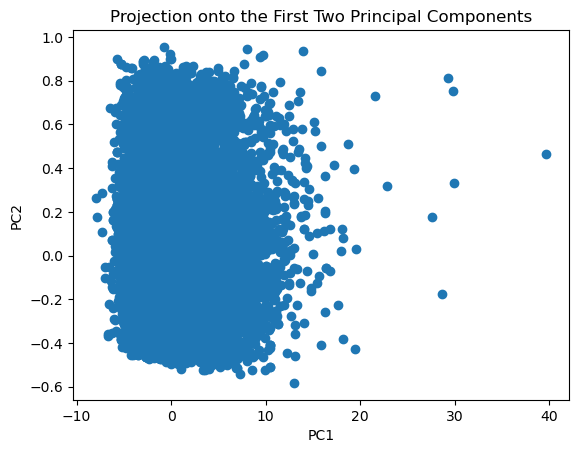

In [3]:
selected_attributes = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']

dataframe = df[selected_attributes]
dataframe = dataframe.dropna()

# Standardize the data
mu = np.mean(dataframe, axis=0)
X = dataframe - mu

# Perform PCA
U, S, VT = np.linalg.svd(X)
V = np.transpose(VT)
Z = np.dot(X, V)

PC1 = V[:, 0]
PC2 = V[:, 1]

#Find the attributes that are primarily represented by the first and second PC
attributes_for_PC1 = dataframe.columns[np.argsort(np.abs(PC1))[::-1]]
attributes_for_PC2 = dataframe.columns[np.argsort(np.abs(PC2))[::-1]]
print("Attribute 1 primarily represented by PC1: " + attributes_for_PC1[0])
print("Attribute 1 primarily represented by PC2: " + attributes_for_PC2[0])
print("Attribute 2 primarily represented by PC1: " + attributes_for_PC1[1])
print("Attribute 2 primarily represented by PC2: " + attributes_for_PC2[1])
print("Attribute 3 primarily represented by PC1: " + attributes_for_PC1[2])
print("Attribute 3 primarily represented by PC2: " + attributes_for_PC2[2])

scatter_pc1_pc2 = plt.figure()
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection onto the First Two Principal Components')
plt.show()

In [4]:
split_percentage = 0.7
split_index = int(len(df) * split_percentage)

df_train = df.iloc[:split_index]

dtc_attr = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence']
X_dtc_attr = df_train[dtc_attr]
y_dtc_attr = df_train['mode'].ravel()

feature_names_list = X_dtc_attr.columns.tolist()

mode_counts = df_train['mode'].value_counts()
mode_counts = mode_counts.sort_values(ascending=False)
print(mode_counts)

dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=450)
dtc.fit(X_dtc_attr, y_dtc_attr)

plt.figure(figsize=(100, 100))
plot_tree(dtc, feature_names=feature_names_list, class_names=['Major', 'Minor'], filled=True, rounded=True, impurity=True, fontsize=8)
plt.show()

mode
1    13490
0     9493
Name: count, dtype: int64


c:\Users\amand\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\amand\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\amand\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\amand\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\amand\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Us


Confusion Matrix:
              Predicted Major  Predicted Minor
Actual Major             3459             1625
Actual Minor             3003             1763


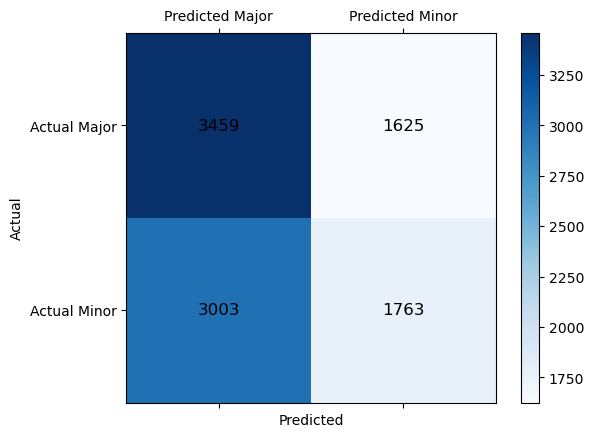

In [5]:
df_test = df.iloc[split_index:]

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for index, row in df_test.iterrows():
    
    X_sample = row[dtc_attr].values.reshape(1,-1)
    predicted_mode = dtc.predict(X_sample)[0]

    actual_mode = row['mode']
    if actual_mode == 1 and predicted_mode == 1:
        true_positive += 1
    elif actual_mode == 0 and predicted_mode == 0:
        true_negative += 1
    elif actual_mode == 1 and predicted_mode == 0:
        false_negative += 1
    elif actual_mode == 0 and predicted_mode == 1:
        false_positive += 1

# Create and print confusion matrix
conf_matrix = pd.DataFrame([[true_positive, false_negative], [false_positive, true_negative]],
                            index=['Actual Major', 'Actual Minor'],
                            columns=['Predicted Major', 'Predicted Minor'])
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], conf_matrix.columns)
plt.yticks([0, 1], conf_matrix.index)
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix.iloc[i, j]), ha='center', va='center', color='black', fontsize=12)
plt.show()

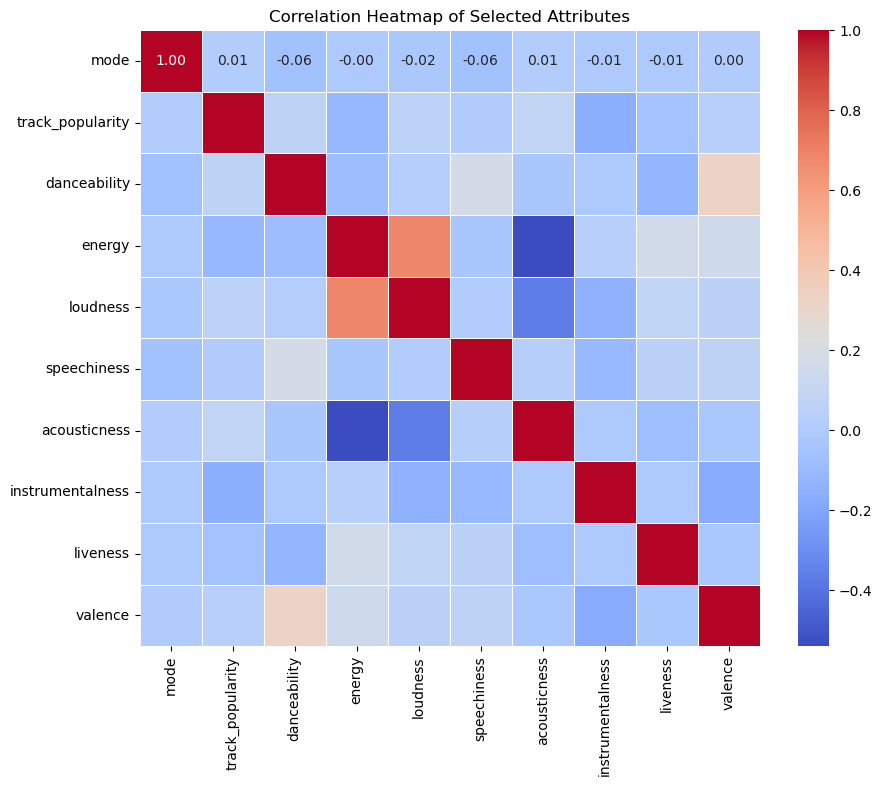

In [6]:
# Select the attributes
attributes = ['mode', 'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Subset the DataFrame with selected attributes and drop rows with missing values
selected_df = df[attributes].dropna()

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()